In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as apu
from pycraf import atm
from pycraf import conversions as cnv

0 0.0005005747868835897 1.3962633242547242 7.734073936838115e-08 1.396263343488419
1 0.0011596729934808536 1.3962631642156231 2.5661353530992415e-07 1.3962632087730544
381 0.01650264480599617 1.395671375711789 0.0007727889850002168 1.395673130696445
0 0.023079872913967847 1.7453264778862518 3.5671219107413776e-06 1.7453256848724188
1 0.05030863252363815 1.7453204323060627 1.1342616438536623e-05 1.745318702391724
405 0.0008882499546416511 1.7447379589225398 0.0007727634945051687 1.7447379247667973
0.0008794122329618403 6371.00534575713 0.00015219615556186315
0.0006937057651157374 6371.00534575713 0.00012005673306703102
406 0.0006937057651157374 1.7447378863655925 0.0007728698681002122 1.7447378525489448
407 0.0006937057651157374 1.7447378863655925 0.0007728698681002122 1.7447378525489448
total path length 1:   5.0000 km
total path length 2:   5.0000 km
refraction: -0.01046 d / -0.01040 d


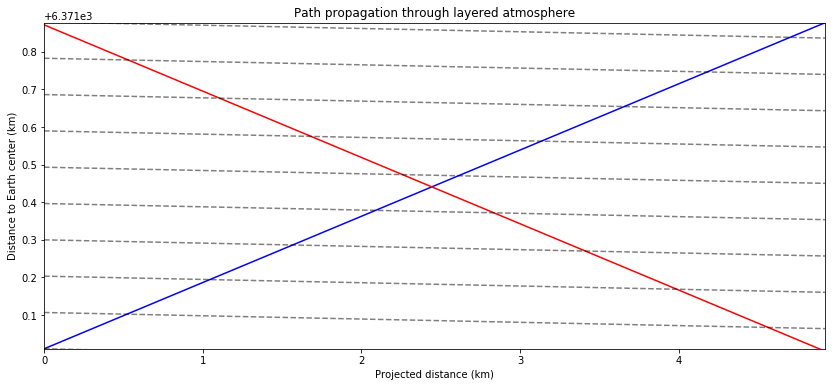

In [3]:
elevation = 10  # deg
obs_alt = 10.  # m
path_params_1, refraction_1 = atm.atm._prepare_path(
    elevation, obs_alt, atm.profile_highlat_winter, max_path_length=5.
    )
elevation = -10  # degrees
obs_alt = 872.  # meters
path_params_2, refraction_2 = atm.atm._prepare_path(
    elevation, obs_alt, atm.profile_highlat_winter, max_path_length=5.
    )

print('total path length 1: {:8.4f} km'.format(sum(t[3] for t in path_params_1)))
print('total path length 2: {:8.4f} km'.format(sum(t[3] for t in path_params_2)))
print('refraction: {:7.5f} d / {:7.5f} d'.format(refraction_1, refraction_2))


radii_1 = np.array([t[4] for t in path_params_1])
angles_1 = np.array([t[6] for t in path_params_1])
heights_1 = np.array([t[8] for t in path_params_1])
radii_2 = np.array([t[4] for t in path_params_2])
angles_2 = np.array([t[6] for t in path_params_2])
layer_angles = np.linspace(0, np.pi / 2, 91)

x1, y1 = radii_1 * np.sin(angles_1), radii_1 * np.cos(angles_1)
x2, y2 = radii_2 * np.sin(angles_2), radii_2 * np.cos(angles_2)

plt.close()
fig = plt.figure(figsize=(14, 6))
plt.plot(x1, y1, 'b-')
plt.plot(x2, y2, 'r-')
for r in np.linspace(radii_1[0], radii_1[-1], 10):
    plt.plot(r * np.sin(layer_angles), r * np.cos(layer_angles), 'k--', alpha=0.5)

plt.xlim((x1[0], x1[-1]))
plt.ylim((y1[0], y1[-1]))
# plt.ylim((y1[0], y2[0]+1e-3))
# plt.xlim((x1[0], 1.2))
# plt.ylim((y2[0]-0.23, y2[0]+0.01))
# plt.xlim((x1[0], 0.01))
# plt.ylim((y1[0]-0.0001, y1[0]+0.001))

plt.title('Path propagation through layered atmosphere')
plt.xlabel('Projected distance (km)')
plt.ylabel('Distance to Earth center (km)')
# plt.gca().set_aspect('equal')
plt.show()




In [4]:
heights_1

array([0.01      , 0.01008692, 0.0102883 , 0.0104917 , 0.01069714,
       0.01090465, 0.01111424, 0.01132594, 0.01153977, 0.01175575,
       0.01197389, 0.01219423, 0.01241679, 0.01264158, 0.01286863,
       0.01309796, 0.0133296 , 0.01356356, 0.01379988, 0.01403857,
       0.01427966, 0.01452317, 0.01476913, 0.01501757, 0.01526849,
       0.01552195, 0.01577794, 0.01603651, 0.01629768, 0.01656148,
       0.01682792, 0.01709705, 0.01736888, 0.01764344, 0.01792076,
       0.01820086, 0.01848378, 0.01876955, 0.01905819, 0.01934972,
       0.01964419, 0.01994162, 0.02024204, 0.02054547, 0.02085196,
       0.02116152, 0.0214742 , 0.02179002, 0.02210901, 0.02243121,
       0.02275665, 0.02308536, 0.02341737, 0.02375272, 0.02409144,
       0.02443356, 0.02477912, 0.02512815, 0.0254807 , 0.02583678,
       0.02619645, 0.02655972, 0.02692665, 0.02729727, 0.02767161,
       0.02804972, 0.02843162, 0.02881736, 0.02920698, 0.02960052,
       0.02999801, 0.03039949, 0.03080501, 0.03121461, 0.03162